In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from IPython.display import Latex

%matplotlib nbagg

In [29]:
def cos(theta):
    return np.cos(theta*np.pi/180)

## Compute d-spacing at th = 20

In [3]:
def sin(theta):
    return np.sin(theta*np.pi/180.)

E = 931.
lam = 1 / (E * 8065.5447 * 1e-8)
theta = 20
d = lam /(2 * sin(theta))

Latex(r'$d$ spacing for $E={:.1f}$ eV and $\theta ={:.1f}^\circ$ is {:.3f} Ang'.format(E, theta, d))

<IPython.core.display.Latex object>

## Composition of multilayer

Top W rho_w = 15.63

Bottom rho_b4c = 2.52  #g/cm3

Set top layer 0.4 of the re

Roughtness 1 AN=ng

Number of periods  40

## Display parameters used 

In [31]:
params = pd.read_csv('params_used.csv')
#Latex(params.to_latex())
params

,No,d,name,delta,beta,sigma,deltam,betam
0,3,0.0000,vacuum,0.000000,0.000000,0.0,0.0,0.0
1,2,11.6810,W,0.001860,0.000663,1.0,0.0,0.0
2,1,7.7874,B4C,0.000597,0.000044,1.0,0.0,0.0
3,0,0.0000,Si,0.000514,0.000044,1.0,0.0,0.0


## Show reflectivity

<IPython.core.display.Javascript object>


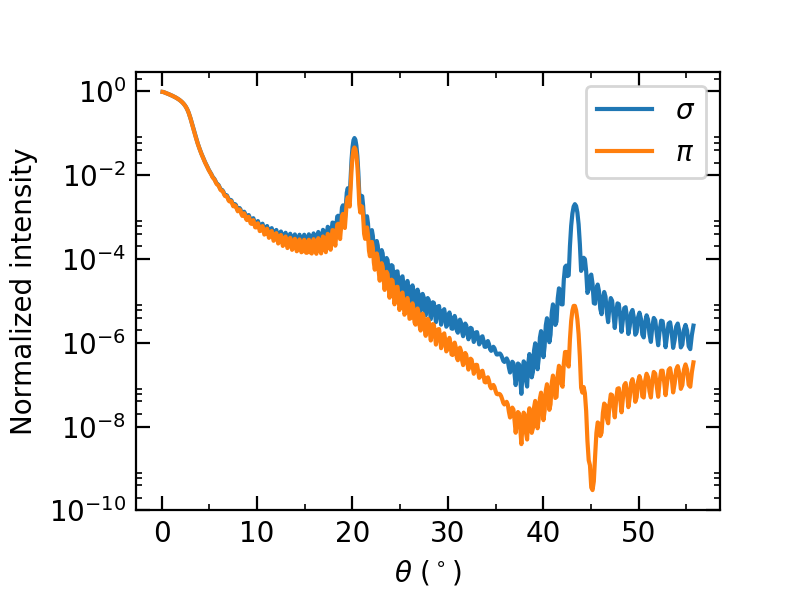

In [36]:
data = np.loadtxt('reflectivity_data.txt')

fig, ax = plt.subplots(figsize=(4, 3))

ax.semilogy(data[:,0], data[:,1], label=r'$\sigma$')
ax.semilogy(data[:,2], data[:,3], label=r'$\pi$')
ax.legend()
ax.set_xlabel(r'$\theta$ ($^\circ$)')
ax.set_ylabel('Normalized intensity')


ax.tick_params(which='major', direction='in', bottom=True, top=True, left=True, right=True, length=5)
ax.tick_params(which='minor', direction='in', bottom=True, top=True, left=True, right=True, length=2)
ax.minorticks_on()
ax.xaxis.set_minor_locator(MultipleLocator(5))
fig.subplots_adjust(left=0.17, bottom=0.15)

fig.savefig('ReMagX.pdf')

In [35]:
choose_rows = np.logical_and(data[:,0] > 19.5, data[:,0] < 20.5)
argmax = np.argmax(data[choose_rows, 1])
maxrow = data[choose_rows][argmax]
ratio =  maxrow[3]/maxrow[1]
thomson = cos(maxrow[0]*2)**2
print("Dynamical diffraction gives {:.3f}".format(ratio))
print("Thomson gives {:.3f}".format(thomson))
print("Percentage error is {:.3f}%".format(100*(ratio-thomson)/(0.5*(ratio+thomson))))


Dynamical diffraction gives 0.596
Thomson gives 0.579
Percentage error is 2.744%
